# Demo 3 - Chomp read_state implementation

<b> Zach Galante </b> 

For this demo, I have chosen to implement the read_state function. This function will take the state from the robot in the game to then return that state as a game board.

In [2]:
!pip install Box2d
!pip install pyglet
!pip install "git+git://github.com/bblais/RobotSim373" --upgrade
!pip install "git+git://github.com/bblais/Game" --upgrade
from Game import * 


  Cloning git://github.com/bblais/RobotSim373 to c:\users\student\appdata\local\temp\pip-req-build-txvahy_q

  Running command git clone -q git://github.com/bblais/RobotSim373 'C:\Users\student\AppData\Local\Temp\pip-req-build-txvahy_q'



  Created wheel for RobotSim373: filename=RobotSim373-0.0.43-py3-none-any.whl size=10007 sha256=eb7e7fbd52f974f10fbcf54f7bc0f83b3cd817fe3bc5a4bd7064930a35b56b26
  Stored in directory: C:\Users\student\AppData\Local\Temp\pip-ephem-wheel-cache-4hvile1t\wheels\53\c2\32\0e474631c7e4eb80e15920a6a0dc4f1c9683cd981f31608cb8
Successfully built RobotSim373
  Attempting uninstall: RobotSim373
    Found existing installation: RobotSim373 0.0.43
    Uninstalling RobotSim373-0.0.43:
      Successfully uninstalled RobotSim373-0.0.43

  Running command git clone -q git://github.com/bblais/Game 'C:\Users\student\AppData\Local\Temp\pip-req-build-qrl7xrzw'



  Cloning git://github.com/bblais/Game to c:\users\student\appdata\local\temp\pip-req-build-qrl7xrzw
  Created wheel for Game: filename=Game-0.2.35-py3-none-any.whl size=16368 sha256=bc5c5a6e14fdffa334639d3e19e29a6b7a61365aa47686c05eff91570087a85e
  Stored in directory: C:\Users\student\AppData\Local\Temp\pip-ephem-wheel-cache-aoox6k33\wheels\98\db\88\b0c4a888c49d8cae118c916c09b4157935368ed67866a4e450
Successfully built Game
  Attempting uninstall: Game
    Found existing installation: Game 0.2.35
    Uninstalling Game-0.2.35:
      Successfully uninstalled Game-0.2.35


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\student\anaconda3.1\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['prod', 'random', 'copy', 'draw', 'randint', 'argmax']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [4]:
from RobotSim373 import *

Version:  0.0.43


# Build Function

In [5]:
def build(robot):
    robot.boxes=[]
    for i in range(7):
        box=Box(robot,x=5+i*1.6,y=1,width=.2,height=1,angle=90,name="Box %d" % i)
        robot.boxes.append(box)


# Functions

## Get Distances
The following function will be used to get the distance to the closest box for each rectangle in the robot. 

In [41]:
def get_distances(t,robot):
    robot.box_distances=[box.read_distance() for box in robot.boxes]
    return True

## Read State
This is the main function to determine the state of the board based off the robot. Using the distances from the rectangles, the state of each column get be determined.

In [42]:
def read_state(t,robot):
    column0 = [0,7,14,21]
    column1 = [1,8,15,22]
    column2 = [2,9,16,23]
    column3 = [3,10,17,24]
    column4 = [4,11,18,25]
    column5 = [5,12,19,26]
    column6 = [6,13,20,27]
    board = Board(4,7)
    column_num =0
    for distance in robot.box_distances:
        if distance < 9:
            for location in eval('column%d'% column_num):
                board[location] = 1
        elif (distance > 9) & (distance < 11):
                missing_pieces = eval('column%d'% column_num)[-1:]
                for missing_piece in missing_pieces:
                    board[missing_piece] = 0
                for board_location in eval('column%d'% column_num)[:-1]:
                    board[board_location] = 1
        elif (distance > 11) & (distance < 12):
                missing_pieces = eval('column%d'% column_num)[-2:]
                for missing_piece in missing_pieces:
                    board[missing_piece] = 0
                for board_location in eval('column%d'% column_num)[:-2]:
                    board[board_location] = 1
        elif (distance > 13) & (distance < 14):
                missing_pieces = eval('column%d'% column_num)[-3:]
                for missing_piece in missing_pieces:
                    board[missing_piece] = 0
                for board_location in eval('column%d'% column_num)[:-3]:
                    board[board_location] = 1
        elif distance > 22:
                for board_location in eval('column%d'% column_num):
                    board[board_location] = 0
        column_num+= 1
        
    return True

In [50]:
def show_state(t,robot):
    print(board)
    return True

In [51]:
state_machine=StateMachine(
    ([get_distances,read_state],"show_state"),
    (show_state, '_end_simulation')
)

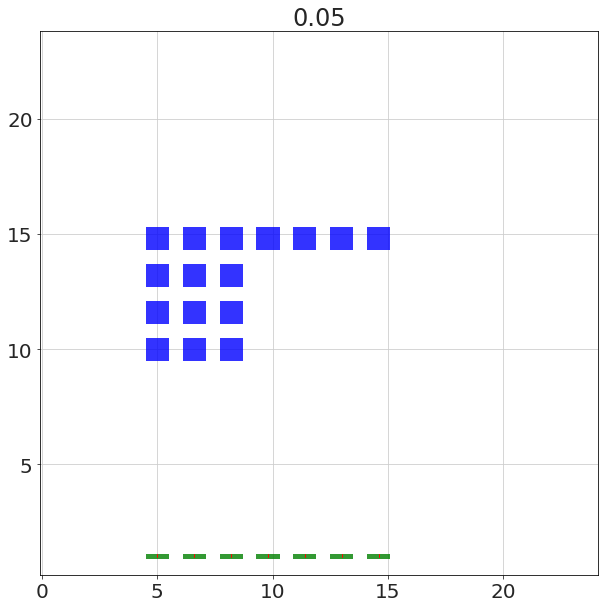

In [53]:
env=FrictionEnvironment(24,24)
robot=Robot(env)
build(robot)
robot.controller=Controller(state_machine)
#robot.controller.monitor=monitor

rows = 4
columns = 7
for row in range(rows):
    for i in range(columns):
        if i >= 3 and row < 3:
            pass
        else:
            Box(env,x=5+i*1.6,y=10 + row*1.6,density=0.001)
run_sim(env,robot.controller,
        total_time=30,  # seconds
        dt=1/60,
        dt_display=0.5,  # make this larger for a faster display
       )

## This one prints out the state

In [35]:
def act(t,robot):
    robot.box_distances=[box.read_distance() for box in robot.boxes]    
    column0 = [0,7,14,21]
    column1 = [1,8,15,22]
    column2 = [2,9,16,23]
    column3 = [3,10,17,24]
    column4 = [4,11,18,25]
    column5 = [5,12,19,26]
    column6 = [6,13,20,27]
    board = Board(4,7)
    column_num =0
    for distance in robot.box_distances:
        if distance < 9:
            for location in eval('column%d'% column_num):
                board[location] = 1
        elif (distance > 9) & (distance < 11):
                missing_pieces = eval('column%d'% column_num)[-1:]
                for missing_piece in missing_pieces:
                    board[missing_piece] = 0
                for board_location in eval('column%d'% column_num)[:-1]:
                    board[board_location] = 1
        elif (distance > 11) & (distance < 12):
                missing_pieces = eval('column%d'% column_num)[-2:]
                for missing_piece in missing_pieces:
                    board[missing_piece] = 0
                for board_location in eval('column%d'% column_num)[:-2]:
                    board[board_location] = 1
        elif (distance > 13) & (distance < 14):
                missing_pieces = eval('column%d'% column_num)[-3:]
                for missing_piece in missing_pieces:
                    board[missing_piece] = 0
                for board_location in eval('column%d'% column_num)[:-3]:
                    board[board_location] = 1
        elif distance > 22:
                for board_location in eval('column%d'% column_num):
                    board[board_location] = 0
        column_num+= 1
        print(board)
        
   

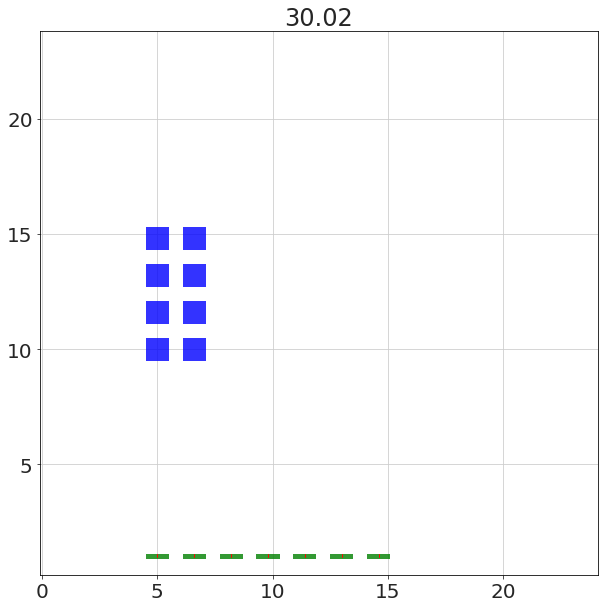

In [54]:
env=FrictionEnvironment(24,24)
robot=Robot(env)
build(robot)
#robot.controller=Controller(state_machine)
#robot.controller.monitor=monitor

rows = 4
columns = 7
for row in range(rows):
    for i in range(columns):
        if i >= 2 and row < 5:
            pass
        else:
            Box(env,x=5+i*1.6,y=10 + row*1.6,density=0.001)
run_sim(env,act,
        total_time=30,  # seconds
        dt=1/60,
        dt_display=0.5,  # make this larger for a faster display
       )

# More Examples

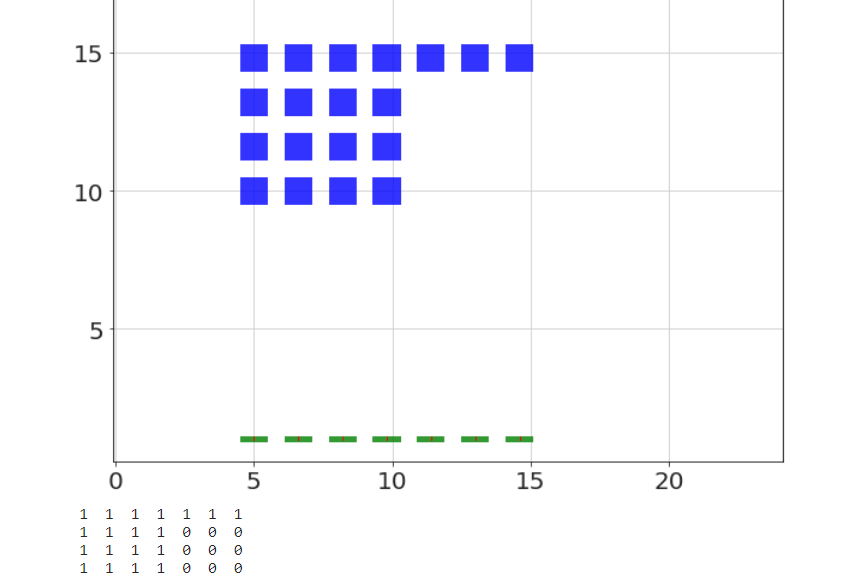

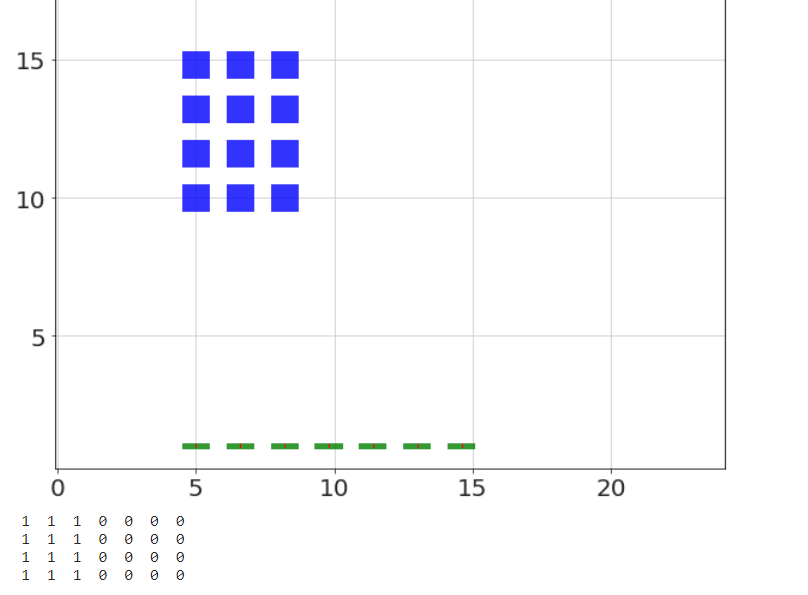

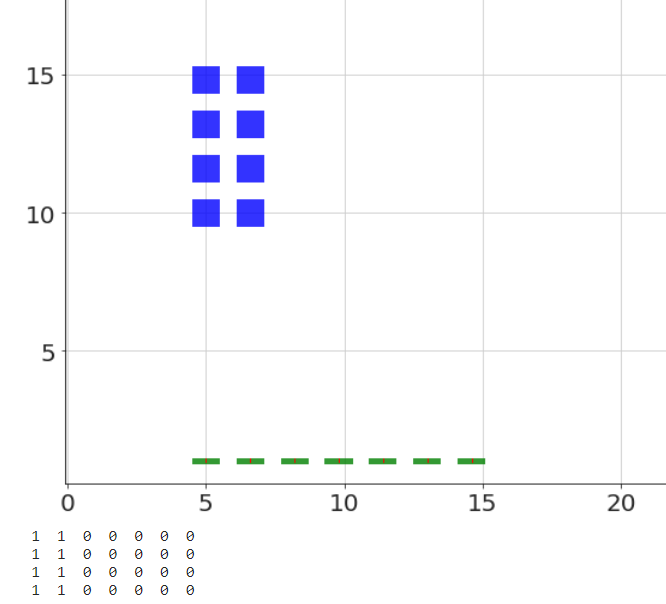